# Doc2Vec 실습코드

In [1]:
import requests
from io import StringIO
import pandas as pd

In [2]:
# 영화리뷰 데이터 다운로드
res = requests.get('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')
df = pd.read_csv(StringIO(res.text), sep='\t')

df.rename(columns={'document': 'content'}, inplace=True)
documents = df['content'].to_list()

In [3]:
from gensim.models.doc2vec import Doc2Vec,TaggedDocument
from tqdm import tqdm
import os

Corpus = []
idx2doc = {}
for idx, text in tqdm(enumerate(documents), desc='데이터 로드', leave=False):
    idx2doc[idx] = str(text)
    for t in str(text).strip().split():
        Corpus.append(TaggedDocument(words=t, tags=[idx]))

In [4]:
print('Doc2vec training...')

# dm = 0 : PV-DM, dm = 1 : PV-DBOW
model = Doc2Vec(Corpus, dm=0, vector_size=100, window=5, epochs=15, min_count=2, negative_size=5, workers=os.cpu_count())

Doc2vec training...


In [5]:
qry_idx = 4188
print('target text: {}:'.format(idx2doc[qry_idx]))
print(' ')
top_3_idx = []
for e in model.docvecs.most_similar(qry_idx, topn=3):
        doc_idx, score = e[0], e[1]
        print('doc_id: {}, score: {}, doc: {}'.format(doc_idx, round(score, 2), idx2doc[doc_idx]))
        top_3_idx.append(doc_idx)

target text: 영화 전체가 어디선가 본듯한 장면들의 짜집기...:
 
doc_id: 42350, score: 0.73, doc: 한국 영화의 진짜 전성기..
doc_id: 20704, score: 0.71, doc: 예측불허의 코메디영화...진짜 그냥지나츨장면에도 개그가 터지는
doc_id: 40056, score: 0.71, doc: 이 영화는 한마디로 기승전병. 병맛영화


## 차원 축소 및 시각화

In [6]:
from gensim.models.doc2vec import Doc2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 모든 문서에 대한 벡터 가져오기
# vectors = [model.docvecs.vectors_docs[i] for i in range(len(model.docvecs))]
vectors = model.docvecs.vectors_docs
# PCA를 사용하여 2차원으로 축소
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)


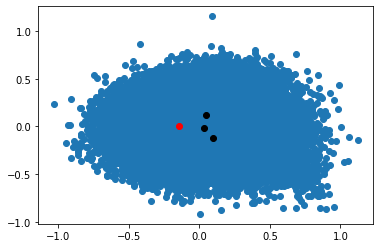

In [7]:
# 시각화
plt.scatter(result[:, 0], result[:, 1])

for idx in top_3_idx:
    plt.scatter(result[idx, 0], result[idx, 1], color='black')
plt.scatter(result[qry_idx, 0], result[qry_idx, 1], color='red')

plt.show()

## 새로운 쿼리가 있다고 가정

In [14]:
from gensim.utils import simple_preprocess

new_sentence = "오랜만에 너무 재미있는 영화, 또 봐야겠다"

# 입력 받은 문장을 전처리
new_doc = new_sentence.lower().split()

# 모델에서 추론된 벡터를 가져옴
inferred_vector = model.infer_vector(new_doc)

# 가장 유사한 문서를 찾음
similar_doc = model.docvecs.most_similar([inferred_vector], topn=1)

# 가장 유사한 문서와 유사도 출력
print(new_sentence)
print("가장 유사한 문서: ", similar_doc[0][0])
print("유사도: ", similar_doc[0][1])
print('sentence: ', idx2doc[similar_doc[0][0]])

오랜만에 너무 재미있는 영화, 또 봐야겠다
가장 유사한 문서:  46869
유사도:  0.819560170173645
sentence:  또 보고 싶다
